<a href="https://colab.research.google.com/github/xy0802/441b/blob/main/HW_Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [15]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [9]:
kmeans = KMeans(n_clusters= 3
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [16]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

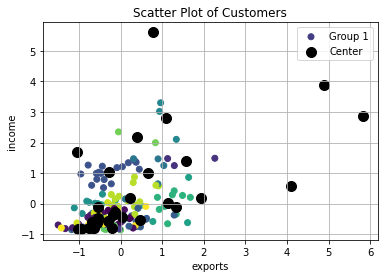

In [71]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 1
x2_index = 4


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [22]:
k = 3
kmeans = KMeans(n_clusters=k, n_init=30, random_state=42)

In [23]:
WCSSs=[]
Ks= range(1,30)
for k in Ks:
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

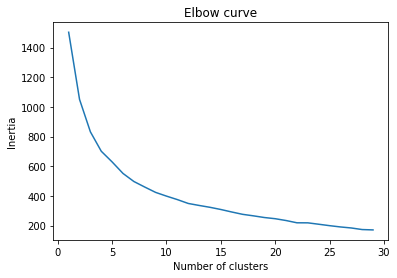

In [24]:
plt.plot(range(1, 30), WCSSs)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow curve")
plt.show()

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

Considering the economic factors, we want to group the countries by different economic characters and take the variable child_mort and income for example, child_mort ranges from 2.6 to 208, inflation ranges from 609 to 125000, so it seems we need more than 3 clusters to capture the  full characteristics.

In addition, according to the elbow  graph, I will choose 10 as the number of clusters because the curve seems level off around the 10. 


# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [62]:
from sklearn.cluster import KMeans
k = 10
km = KMeans(n_clusters=k, random_state=0)
km.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=0)

In [63]:
cluster_labels = km.predict(X)
for i in range(10):
    print(f"Countries in cluster {i}: {list(df.country[cluster_labels == i])}")

Countries in cluster 0: ['Antigua and Barbuda', 'Argentina', 'Barbados', 'Brazil', 'Chile', 'Croatia', 'Estonia', 'Gabon', 'Hungary', 'Iran', 'Kazakhstan', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Malaysia', 'Mauritius', 'Panama', 'Poland', 'Romania', 'Russia', 'Seychelles', 'Slovak Republic', 'Turkey', 'Uruguay', 'Venezuela']
Countries in cluster 1: ['Norway', 'Switzerland']
Countries in cluster 2: ['Afghanistan', 'Angola', 'Armenia', 'Bangladesh', 'Benin', 'Bhutan', 'Bolivia', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Eritrea', 'Gambia', 'Georgia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Moldova', 'Morocco', 'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Philippines

cluster0 seems have low export,low gdp, low income and high inflation...

cluster1 seems have low export ,high gdp, high income and high health rate...

cluster2 seems have high income, high export, high gdp...

 ......


#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [69]:
centers = km.cluster_centers_
stats_df = pd.DataFrame(centers, columns=df.columns[2:])
stats_df.insert(0, 'Cluster', range(10))
print(stats_df)

   Cluster    exports      health    imports      income      inflation  \
0        0  14.119231   48.030769   6.423462   46.557692   19330.769231   
1        1   3.850000   51.850000  10.490000   40.900000   58900.000000   
2        2  74.470769   28.559985   6.246769   46.130245    3022.815385   
3        3   4.313333   44.340000  10.848667   40.993333   41453.333333   
4        4   2.800000  175.000000   7.770000  142.000000   91700.000000   
5        5   8.033333  111.366667   3.143333   77.466667   75966.666667   
6        6  23.194595   40.151351   6.417568   45.108108   10750.810811   
7        7  13.253846   51.669231   8.408462   51.469231   30207.692308   
8        8  11.150000   65.625000   3.922500   47.175000   47350.000000   
9        9   9.000000   62.300000   1.810000   23.800000  125000.000000   

   life_expec  total_fer      gdpp        cluster  
0    7.592423  74.661538  1.961923   11253.461538  
1    3.133500  81.600000  1.735000   81200.000000  
2   10.121015  62.

# Q7.) Write an observation about the descriptive statistics.

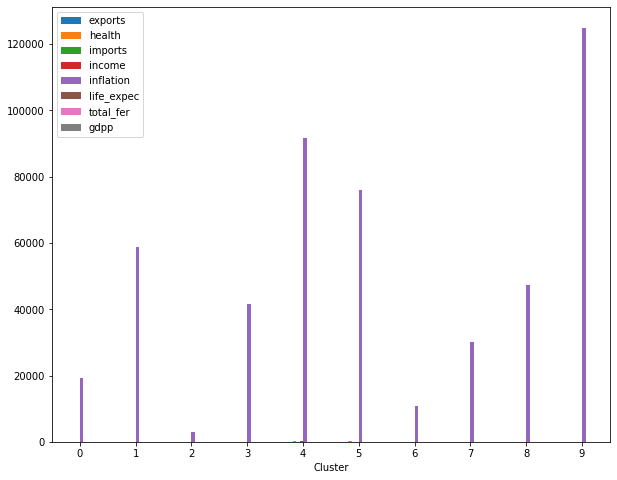

In [56]:
stats_df.plot(kind='bar', x='Cluster', y=['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'], figsize=(10,8))
plt.xticks(rotation=0)
plt.show()

From the table, we can prove our findings from question 5. For example, cluster 2 has pretty high exports and relatively high income and gdp. 